# D2872 - Nitrogen quantitative analyses

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
# Set up to find custom python package
import os
import sys
import numpy as np
sys.path.insert(1, ".")
sys.path.insert(1, "..")

In [7]:
from src import readfiles, wdscan, correct_quant, calczaf, helper_funs
import pickle
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Quantitative analysis

In [8]:
sample = 'D2872'
sample_folders = [Path(f'../data/raw/basaltic_glasses_StA/raw_quant_by_sample/{sample}/')]
# List of folders corresponding to the samples
category = 'basaltic glasses' # Category of this dataset (e.g. "glasses")
wd_scan = Path(f'../data/interim/basaltic_glasses/fits/key_params_{sample}.txt') # Path to wd scan fit parameters
std_dbase_info_file = Path('data/_dictionaries/standards.csv')

In [9]:
datalist = readfiles.find_files_and_folders(
                [sample], sample_folders,
                # apf_file = None,
                apf_file=Path('../data/_dictionaries/apf_values.csv'), #<- Can put None in here
                wd_scan=wd_scan
                )

datalist

Comments found: ['D2872_100nA_30um_1', 'D2872_100nA_30um_2', 'D2872_100nA_30um_3', 'D2872_50nA_20um_1', 'D2872_50nA_20um_146.6_180s_1', 'D2872_50nA_20um_146.6_180s_2', 'D2872_50nA_20um_146.6_180s_3', 'D2872_50nA_20um_146.6_180s_4', 'D2872_50nA_20um_146.6_180s_5', 'D2872_50nA_20um_2', 'D2872_50nA_20um_3', 'D2872_50nA_20um_4', 'D2872_50nA_20um_5', 'D2872_50nA_20um_6']


,folder,comment,sample,paramfile,apf,apf_sd
0,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_100nA_30um_1,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
1,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_100nA_30um_2,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
2,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_100nA_30um_3,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
3,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_50nA_20um_1,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
4,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_50nA_20um_146.6_180s_1,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
5,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_50nA_20um_146.6_180s_2,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
6,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_50nA_20um_146.6_180s_3,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
7,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_50nA_20um_146.6_180s_4,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
8,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_50nA_20um_146.6_180s_5,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
9,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2872_50nA_20um_2,D2872,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2


In [10]:
myspot = [None] * len(datalist.folder)

for i in range(len(datalist.folder)):
    peak, bg, standard, info = readfiles.read_and_organise_data(
                                    datalist.loc[i,:].copy(),
                                    bgi=False,
                                    save=False)
    myspot[i] = correct_quant.Spot()
    myspot[i].add_data(info, bg, peak, standard)
    myspot[i].add_wd_scan_params_from_file(wd_scan)
    print('Read dataset:', i + 1, 'of', len(datalist), ':',
          myspot[i].info.comment)
    myspot[i].comprehensify_data()


 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2872.txt
{'sigma': 0.0432318540326726, 'center': 107.90302352779099}
Read dataset: 1 of 14 : D2872_100nA_30um_1

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2872.txt
{'sigma': 0.0432318540326726, 'center': 107.90302352779099}
Read dataset: 2 of 14 : D2872_100nA_30um_2

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2872.txt
{'sigma': 0.0432318540326726, 'center': 107.90302352779099}
Read dataset: 3 of 14 : D2872_100nA_30um_3

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2872.txt
{'sigma': 0.0432318540326726, 'center': 107.90302352779099}
Read dataset: 4 of 14 : D2872_50nA_20um_1

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2872.txt
{'sigma': 0.0432318540326726, 'center': 107.90302352779099}
Read dataset: 5 of 14 : D2872_50nA_20um_146.6_180s_1

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2872.txt
{'sigma': 0.04323185403267

In [11]:
correct_quant.process_datasets(
    myspot, 
    datalist, 
    num_mc_sims=100, 
    path_out=Path(f"../data/processed/basaltic_glasses/background_corrections/{sample}")
    )


Processing dataset: 1 of 14 : D2872_100nA_30um_1
Correcting background
Saved bg correction figure for 2021-12-22_D2872_100nA_30um_1
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-22_D2872_100nA_30um_1
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 1.16 ± 24.65%

Processing dataset: 2 of 14 : D2872_100nA_30um_2
Correcting background
Saved bg correction figure for 2021-12-22_D2872_100nA_30um_2
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-22_D2872_100nA_30um_2
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 1.22 ± 24.62%

Processing dataset: 3 of 14 : D2872_100nA_30um_3
Correcting background
Saved bg correction figure for 2021-12-22_D2872_100nA_30um_3
Resample cps to check stdev method
Montecar

Write calczaf file

In [12]:
samples = [sample]
category = 'basaltic glasses'
subfolder = Path(f'../data/processed/basaltic_glasses/calczaf_files/{sample}/')

write_detection_limit_calczaf_files = True
detlim_subfolder = subfolder / Path('detlim')

# note: in the subfolder there must be a file specifying valence.
# this can be copied from the _dictionaries folder.
valence_dict = readfiles.read_valence_file(subfolder, pattern='valence*')
standard_database_dict = pd.read_csv(
    '../data/_dictionaries/standards.csv',
     index_col=0, 
     header=None, 
     squeeze=True).to_dict()

standard_database_dict

{'Sanidine': 3000,
 'Diopside': 3001,
 '08_Pollucite': 3002,
 'Albite': 3003,
 'GaN': 608,
 '22_Mo': 542,
 '09_Vanadium_Wire_Alfa': 523,
 'BN': 604}

In [13]:
# Make a dictionary
sampledata = {sample: myspot}

Get the major element analyses

In [14]:
majors_summary = pd.read_csv(
    "../data/processed/basaltic_glasses/basaltic_glasses_majors_summary.csv",
    header = [0, 1], index_col=0)
majors_summary[sample]

,wt% mean,stdev
Si,22.842,0.053
Al,8.135,0.032
Cl,4.394,0.049
P,0.082,0.006
Fe,0.135,0.017
Mn,0.183,0.005
Cr,0.024,0.006
K,0.172,0.005
Ca,10.463,0.052
Ru,0.000,0.000


In [15]:
# Remove Oxygen and Total from the dataframe to get all other element values
majors_relevant = majors_summary[sample].loc[
    majors_summary[sample].index[~majors_summary[sample].index.isin(["O", "Total"])],
    "wt% mean",
]
majors_relevant

Si    22.842
Al     8.135
Cl     4.394
P      0.082
Fe     0.135
Mn     0.183
Cr     0.024
K      0.172
Ca    10.463
Ru     0.000
Na     1.279
Mg     5.303
Name: wt% mean, dtype: float64

In [16]:
# For multiple different methods of processing the data, add a description
run_descriptor = ['_1_base', '_2_bg', '_3_bg_apf']  
# Leave as a list of an empty string if not using: e.g. run_descriptor = ['']

for i in range(len(samples)):

    # Here we pass in these arguments as a dictionary - this is useful in order
    # to reuse the arguments for the detection limit function. But you can
    # alternatively pass in each argument just by defining it in the function
    # as normal (see glasses example).

    args = {
              'elementByDifference' : 'h' # string element symbol
            , 'elementByStoichToStoichOxygen' : None # string element symbol
            , 'stoichOxygenRatio' : 0
            # for hyalophane there is H
            # that can be defined stoichiometrically relative to N:
            , 'elementByStoichToOtherElement' : None
            , 'OtherElement' : None
            , 'stoichElementRatio' : None

            , 'correct_bg' : False
            , 'correct_apf' : False

            # Elements to omit from matrix correction
            # (e.g. if analysed but not actually present in sample)
            , 'remove_elements' : None

            , 'definedElements' : majors_relevant.index # list of element symbols to add
            , 'definedElementWts' : majors_relevant.values # list of known element wt% to add
            }
    
    # Make copies of args with different values
    args2 = args.copy()
    args2["correct_bg"] = True
    args2["correct_apf"] = False

    args3 = args2.copy()
    args3["correct_bg"] = True
    args3["correct_apf"] = True

    args_list = [args, args2, args3]

    for j in range(len(run_descriptor)):
        print("******************************************************")
        print(args_list[j]["correct_bg"], args_list[j]["correct_apf"])
        print("******************************************************")

        calczaf_path_out = subfolder / '{}{}.dat'.format(
                                            samples[i], run_descriptor[j])
        open(calczaf_path_out, 'w').close()  # Erase contents of file

        if write_detection_limit_calczaf_files:
            
            detlim_path_out = detlim_subfolder / '{}{}_detlim.dat'.format(
                                            samples[i], run_descriptor[j])
            open(detlim_path_out, 'w').close()  # Erase contents of file

        for spot in sampledata[samples[i]]:

            calczaf.write_calczaf_input(
                spot, calczaf_path_out, valence_dict, standard_database_dict,
                accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                **args_list[j]) # <- **args unpacks the args dictionary defined earlier
                # so that all those arguments are passed into the function
                # without the need to type them all out.

            if write_detection_limit_calczaf_files:
                if args_list[j]['correct_bg']:

                    detlim_spot = correct_quant.create_detection_limit_spot(spot)

                    calczaf.write_calczaf_input(
                        detlim_spot, detlim_path_out, valence_dict, 
                        standard_database_dict,
                        accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                        **args_list[j])
                    
                else:
                    print('\n\nWarning: Not writing detection limit file.' 
                            'Calculating detection limit does not make sense'
                            ' except on background-corrected data. Raw data files' 
                            ' contain an estimate of detection limit without bg'
                            ' correction.\n')
                    
    

******************************************************
False False
******************************************************
Wrote CALCZAF file for D2872_100nA_30um_1 to ..\data\processed\basaltic_glasses\calczaf_files\D2872\D2872_1_base.dat



Wrote CALCZAF file for D2872_100nA_30um_2 to ..\data\processed\basaltic_glasses\calczaf_files\D2872\D2872_1_base.dat



Wrote CALCZAF file for D2872_100nA_30um_3 to ..\data\processed\basaltic_glasses\calczaf_files\D2872\D2872_1_base.dat



Wrote CALCZAF file for D2872_50nA_20um_1 to ..\data\processed\basaltic_glasses\calczaf_files\D2872\D2872_1_base.dat



Wrote CALCZAF file for D2872_50nA_20um_146.6_180s_1 to ..\data\processed\basaltic_glasses\calczaf_files\D2872\D2872_1_base.dat



Wrote CALCZAF file for D2872_50nA_20um_146.6_180s_2 to ..\data\processed\basaltic_glasses\calczaf_files\D2872\D2872_1_base.dat



Wrote CALCZAF file for D2872_50nA_20um_146.6_180s_3 to ..\data\processed\basaltic_glasses\calczaf_files\D2872\D2872_1_base.dat



Wrote CAL

## Process calczaf outputs

In [17]:
folderpath = Path(f'../data/processed/basaltic_glasses/calczaf_files/{sample}/')

helper_funs.check_calczaf_folder_exists(folderpath)
valence_file = sorted(folderpath.glob('valence*'))[0]

results = calczaf.process_calczaf_outputs(folderpath, valence_file)

# For detection limits

results_detlim = calczaf.process_calczaf_outputs(folderpath / 'detlim/', valence_file, detlim=True)

[                     0           1           2           3           4           5           6           7           8           9           10          11          12          13
wt% element                                                                                                                                                                        
Si            22.842000   22.842000   22.842000   22.842000   22.842000   22.842000   22.842000   22.842000   22.842000   22.842000   22.842000   22.842000   22.842000   22.842000
Al             8.135000    8.135000    8.135000    8.135000    8.135000    8.135000    8.135000    8.135000    8.135000    8.135000    8.135000    8.135000    8.135000    8.135000
Ca            10.463000   10.463000   10.463000   10.463000   10.463000   10.463000   10.463000   10.463000   10.463000   10.463000   10.463000   10.463000   10.463000   10.463000
Mg             5.303000    5.303000    5.303000    5.303000    5.303000    5.303000    5.303000    

In [18]:
summary_tables = correct_quant.write_summary_excel_tables(
    myspot, 
    f"../data/processed/basaltic_glasses/kraw_summaries_{sample}.xlsx"
    )

typical_kratios = pd.DataFrame({
    "K-ratio": [
        summary_tables[0]["original.kraw_pcnt"].mean(),
        summary_tables[0]["montecarlo.kraw_pcnt"].mean(),
        summary_tables[0]["montecarlo.kraw_apf_pcnt"].mean()
    ],
    "Stdev % (relative)": [
        max(
            summary_tables[0]["original.kraw_stdev_pcnt"].mean(),
            summary_tables[0]["original.kraw_pcnt"].std()
            ),
        max(
            summary_tables[0]["montecarlo.kraw_stdev_pcnt"].mean(),
            summary_tables[0]["montecarlo.kraw_pcnt"].std()
            ),
        max(
            summary_tables[0]["montecarlo.kraw_stdev_apf_pcnt"].mean(),
            summary_tables[0]["montecarlo.kraw_apf_pcnt"].std()
            )
    ]
}, index = [
    "Original K-ratio (%)", 
    "Bg-corrected K-ratio (%)", 
    "Bg- and APF-corrected K-ratio (%)"
    ]
)

typical_kratios.insert(
    1, 
    column="Stdev (absolute)", 
    value = typical_kratios["K-ratio"] * typical_kratios["Stdev % (relative)"] / 100
    )

typical_kratios["filename"] = results["wtdata"].keys()
typical_kratios.reset_index(inplace=True)
typical_kratios.set_index("filename", inplace=True)
        # .loc[nm, "Stdev % (relative)"]/100
# )
typical_kratios


,index,K-ratio,Stdev (absolute),Stdev % (relative)
filename,,,,
D2872_1_base,Original K-ratio (%),0.000000,0.000000,100.000000
D2872_2_bg,Bg-corrected K-ratio (%),0.810714,0.086764,10.702143
D2872_3_bg_apf,Bg- and APF-corrected K-ratio (%),0.977857,0.261339,26.725714


Plot all spots goruped by their method

In [19]:
suffix = "3_bg_apf"
stdev_string = "kraw_stdev_apf_pcnt"

In [20]:
results["wtdata"][f"{sample}_{suffix}"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,average,stdev,minimum,maximum
wt% element,,,,,,,,,,,,,,,,,,
Si,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,22.842000,7.373650e-15,22.842000,22.842000
Al,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,8.135000,1.843413e-15,8.135000,8.135000
Ca,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,10.463000,1.843413e-15,10.463000,10.463000
Mg,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,5.303000,9.217063e-16,5.303000,5.303000
Fe,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.135000,0.000000e+00,0.135000,0.135000
Mn,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,0.183000,2.880332e-17,0.183000,0.183000
K,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.172000,0.000000e+00,0.172000,0.172000
Na,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000,0.000000e+00,1.279000,1.279000
H,0.571761,0.570485,0.574170,0.580838,0.573231,0.578376,0.579526,0.575738,0.577811,0.576680,0.574471,0.580464,0.575347,0.575167,0.576005,3.138848e-03,0.570485,0.580838


In [21]:
N_by_method = pd.DataFrame(
    {"comment": datalist["comment"],
     "N wt": results["wtdata"][f"{sample}_{suffix}"].loc["N", list(range(0, len(datalist.index)))],
     "N detlim": results_detlim["wtdata"][f"{sample}_{suffix}_detlim"].loc["N", list(range(0, len(datalist.index)))], 
     "N stdev pct": summary_tables[0][f"montecarlo.{stdev_string}"],
     "N stdev abs": (
         results["wtdata"][f"{sample}_{suffix}"]
        .loc["N", list(range(0, len(datalist.index)))] * 
        summary_tables[0][f"montecarlo.{stdev_string}"]/100
        )
     }
     )

N_by_method["method"] = N_by_method["comment"].str.replace(r'_[0-9]+$', '', regex=True)
N_by_method.groupby("method")["N wt"].mean()

method
D2872_100nA_30um              0.237583
D2872_50nA_20um               0.192701
D2872_50nA_20um_146.6_180s    0.194705
Name: N wt, dtype: float64

In [22]:
N_by_method.round(3).sort_values("method")

,comment,N wt,N detlim,N stdev pct,N stdev abs,method
0,D2872_100nA_30um_1,0.241,0.015,24.65,0.059,D2872_100nA_30um
1,D2872_100nA_30um_2,0.252,0.013,24.62,0.062,D2872_100nA_30um
2,D2872_100nA_30um_3,0.219,0.014,24.94,0.055,D2872_100nA_30um
3,D2872_50nA_20um_1,0.160,0.034,30.07,0.048,D2872_50nA_20um
9,D2872_50nA_20um_2,0.197,0.031,27.92,0.055,D2872_50nA_20um
10,D2872_50nA_20um_3,0.217,0.030,28.29,0.061,D2872_50nA_20um
11,D2872_50nA_20um_4,0.163,0.028,32.33,0.053,D2872_50nA_20um
12,D2872_50nA_20um_5,0.209,0.035,27.44,0.057,D2872_50nA_20um
13,D2872_50nA_20um_6,0.211,0.033,27.39,0.058,D2872_50nA_20um
4,D2872_50nA_20um_146.6_180s_1,0.228,0.017,25.23,0.057,D2872_50nA_20um_146.6_180s


Text(0.5, 1.0, 'D2872')

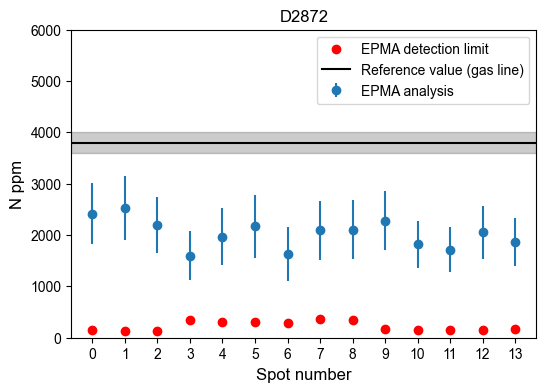

In [23]:
N_by_method_sorted = N_by_method.sort_values("method").reset_index()

plt.errorbar(
    x=N_by_method_sorted.index, 
    y=N_by_method_sorted["N wt"] * 10000, 
    yerr=N_by_method_sorted["N stdev abs"] * 10000,
    marker="o",
    linestyle="",
    label="EPMA analysis"
    )

plt.scatter(
    x=N_by_method_sorted.index,
    y=N_by_method_sorted["N detlim"]*10000,
    color="r",
    label="EPMA detection limit",
    zorder=0
)
plt.xticks(range(0,len(N_by_method_sorted.index)))
plt.ylim(0, 6000)
plt.ylabel("N ppm")
plt.xlabel("Spot number")

plt.axhline(y=3800, color="k", label="Reference value (gas line)")
plt.axhspan(ymin=(3800-200), ymax=(3800+200), color="k", alpha=0.2)
plt.legend()
plt.title(sample)


There's a bit of variability in the N content by method, but it's hard to tell if it's truly relating to the method or just variability in the sample. For example the spots done at 100 nA and 30 microns seem to show higher average nitrogen, but I only have three spots for these.

I don't think it's obvious enough to worry about, and I'll just report the average of all analyses.

In [24]:
n_summary = {}
for nm in results["wtdata"].keys():
    n_summary[nm] = results["wtdata"][nm].loc["N", ["average", "stdev"]]
    n_summary[nm].rename({"average": "N wt% average"}, inplace=True)
    n_summary[nm].rename({"stdev": "stdev (multiple measurements)"}, inplace=True)
    n_summary[nm]["typical stdev on individual measurement"] = (
        n_summary[nm]["N wt% average"] * 
        typical_kratios
        .loc[nm, "Stdev % (relative)"]/100
    )

pd.concat(n_summary, axis=1).transpose()

,N wt% average,stdev (multiple measurements),typical stdev on individual measurement
D2872_1_base,0.000000,0.000000,0.000000
D2872_2_bg,0.168521,0.023282,0.017843
D2872_3_bg_apf,0.203034,0.028050,0.054238


In [25]:
wt_pct_summary_table = pd.concat(
    {k: v[["average", "stdev"]] for k, v in results["wtdata"].items()},
    axis=1
    ).round(3)

# wt_pct_summary_table.to_csv("../data/processed/hyalophane_StA/wt_pct_summary_GaNcalib.csv")

wt_pct_summary_table


D2872_1_base       D2872_2_bg        D2872_3_bg_apf       
                 average stdev    average  stdev        average  stdev
wt% element                                                           
Si                22.842   0.0     22.842  0.000         22.842  0.000
Al                 8.135   0.0      8.135  0.000          8.135  0.000
Ca                10.463   0.0     10.463  0.000         10.463  0.000
Mg                 5.303   0.0      5.303  0.000          5.303  0.000
Fe                 0.135   0.0      0.135  0.000          0.135  0.000
Mn                 0.183   0.0      0.183  0.000          0.183  0.000
K                  0.172   0.0      0.172  0.000          0.172  0.000
Na                 1.279   0.0      1.279  0.000          1.279  0.000
H                  0.599   0.0      0.580  0.003          0.576  0.003
N                  0.000   0.0      0.169  0.023          0.203  0.028
P                  0.082   0.0      0.082  0.000          0.082  0.000
Cl                 4.394   0.0      4.394  0.000          4.394  0.000
Cr                 0.024   0.0      0.024  0.000          0.024  0.000
Ru                 0.000   0.0      0.000  0.000          0.000  0.000
O                 46.389   0.0     46.240  0.021         46.209  0.025
TOTAL            100.000   0.0    100.000  0.000        100.000  0.000

This is with hydrogen by difference.